# Import Kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
from skimage import io, color, img_as_float, img_as_ubyte, exposure, filters
from scipy.ndimage import convolve

In [2]:
import imutils
import easyocr

## Module 0: Image Cropped Plate And Detect car license plate

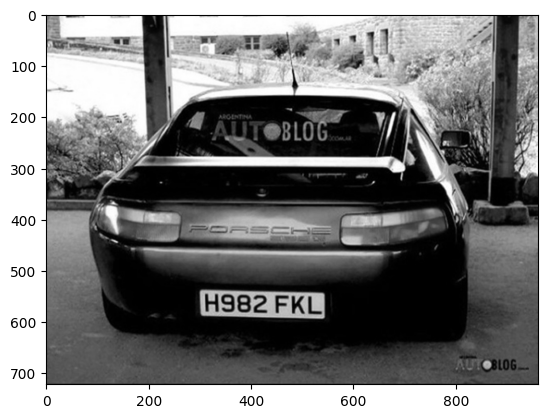

In [3]:
imgP = cv2.imread("image3.jpg")
img = imgP
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

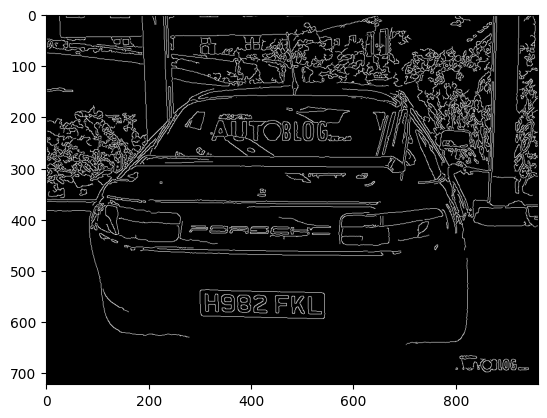

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [7]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

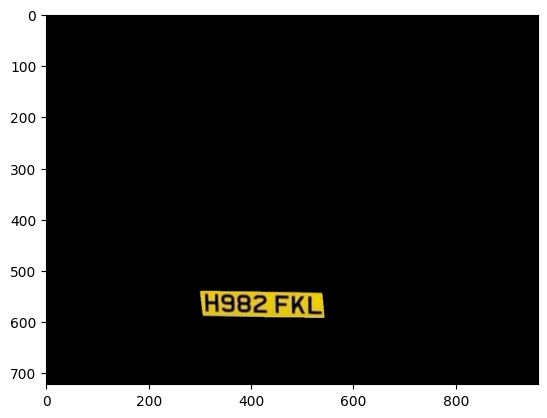

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

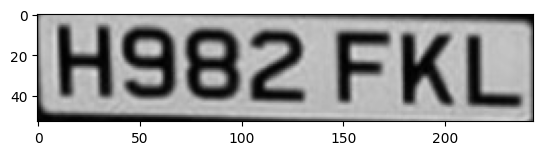

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]],
  'H982 FKL',
  np.float64(0.9769778047590311))]

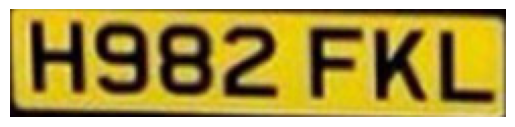

True

In [13]:
img1 = imgP
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# ทำการกรองและตรวจจับขอบ
bfilter = cv2.bilateralFilter(gray1, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)

# หา contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

# สร้างหน้ากากและใช้หน้ากากกับภาพสีต้นฉบับแทน
mask = np.zeros(gray1.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img1, img1, mask=mask)

# หาพิกัดที่ต้องครอบและทำการครอบจากภาพสีต้นฉบับ
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image_1 = img1[x1:x2+1, y1:y2+1]

# แสดงภาพที่ถูกครอบในสี RGB
plt.imshow(cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')  # ซ่อนแกน x และ y
plt.show()
cv2.imwrite('cropped_image.png', cropped_image_1)


In [14]:
from PIL import Image
import pytesseract

# Load the image
image_path = "cropped_image.png"
image = Image.open(image_path)

# Use Tesseract to extract text
text = pytesseract.image_to_string(image, config='--psm 8').strip()
text

'HS82 FKL'

In [15]:
import re

# Clean the extracted text to only include alphanumeric characters
cleaned_text = re.sub(r'[^A-Za-z0-9]', '', text)
cleaned_text


'HS82FKL'

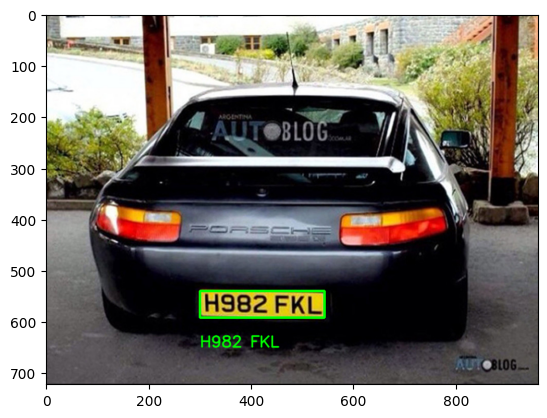

In [16]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [17]:
text = result[0][-2]
text

'H982 FKL'

## Module 1: Image Enhancement (Handled by Student 1)

### 1. Histogram Processing

##### Histogram Equalization

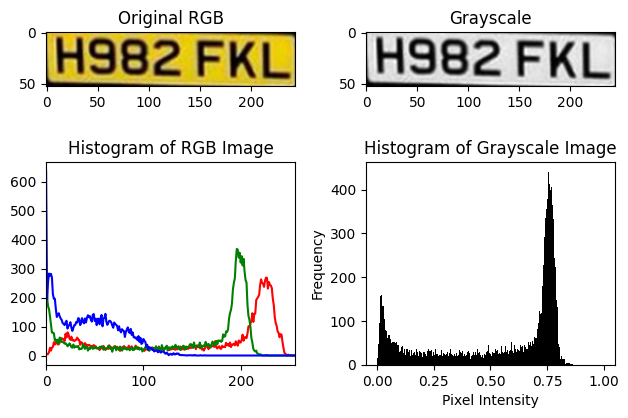

In [18]:
# อ่านภาพในโหมดสี (Color)
img_cropped = cv2.imread('cropped_image.png')
img = img_cropped
# img_color = io.imread('s-l1600.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # เปลี่ยนจาก BGR เป็น RGB

# แปลงจาก RGB เป็นสีเทา (Grayscale)
img_gray = color.rgb2gray(img_rgb)

# แสดงผลลัพธ์ภาพ
plt.subplot(2, 2, 1), plt.imshow(img_rgb), plt.title('Original RGB')
plt.subplot(2, 2, 2), plt.imshow(img_gray, cmap='gray'), plt.title('Grayscale')

# สร้างและแสดง Histogram ของภาพต้นฉบับ (RGB)
plt.subplot(2, 2, 3)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram of RGB Image')

# สร้างและแสดง Histogram ของภาพสีเทา
plt.subplot(2, 2, 4)
plt.hist(img_gray.ravel(), bins=256, range=[0, 1], color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

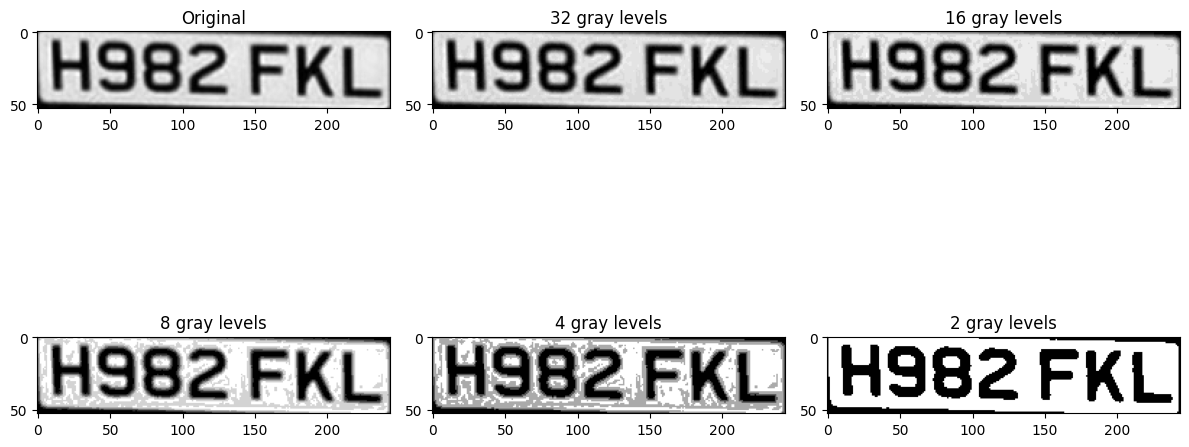

In [19]:
# Load image
v, h = img_gray.shape

# Create a figure
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original image
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original')

# Function to quantize image
def quantize_image(img, levels):
    step = 256 / levels
    buf = np.zeros_like(img)
    for ic in range(levels):
        indices = np.where((step * ic) <= img * 255)
        buf[indices] = ic
    return img_as_ubyte(buf / (levels - 1))

# Quantized images
gray_levels = [32, 16, 8, 4, 2]
titles = ['32 gray levels', '16 gray levels', '8 gray levels', '4 gray levels', '2 gray levels']

for i, levels in enumerate(gray_levels):
    buf = quantize_image(img_gray, levels)
    row, col = divmod(i + 1, 3)  # Adjusting column and row indices correctly
    axs[row, col].imshow(buf, cmap='gray')
    axs[row, col].set_title(titles[i])

# Adjust layout and display the images
plt.tight_layout()
plt.show()

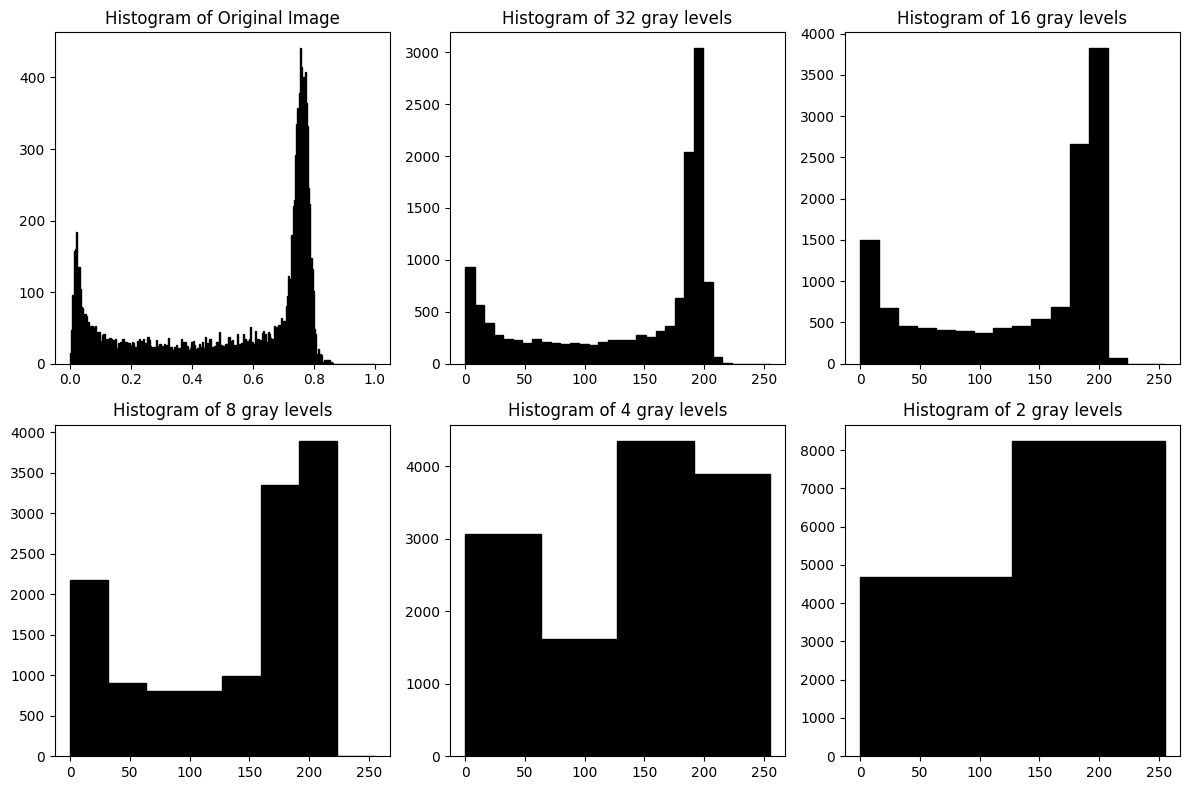

In [20]:
# Load image
v, h = img_gray.shape

# Function to quantize image
def quantize_image(img, levels):
    step = 256 / levels
    buf = np.zeros_like(img)
    for ic in range(levels):
        indices = np.where((step * ic) <= img * 255)
        buf[indices] = ic
    return img_as_ubyte(buf / (levels - 1))

# Quantized images
gray_levels = [32, 16, 8, 4, 2]
titles = ['32 gray levels', '16 gray levels', '8 gray levels', '4 gray levels', '2 gray levels']

# Create a figure for the histograms
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original image histogram
axs[0, 0].hist(img_gray.ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
axs[0, 0].set_title('Histogram of Original Image')

# Histograms for quantized images
for i, levels in enumerate(gray_levels):
    buf = quantize_image(img_gray, levels)
    row, col = divmod(i + 1, 3)  # Adjusting row and column indices correctly
    axs[row, col].hist(buf.ravel(), bins=levels, range=(0.0, 255), fc='black', ec='black')
    axs[row, col].set_title(f'Histogram of {titles[i]}')

# Adjust layout and display the histograms
plt.tight_layout()
plt.show()

### SAVE IMG

In [21]:
# Function to quantize image
def quantize_image(img, levels):
    step = 256 / levels
    buf = np.zeros_like(img)
    for ic in range(levels):
        indices = np.where((step * ic) <= img * 255)
        buf[indices] = ic
    return img_as_ubyte(buf / (levels - 1))

# Quantize the image to 4 gray levels
buf_4_gray = quantize_image(img_gray, 4)
buf_16_gray = quantize_image(img_gray, 16)

# Save the image
io.imsave('License_plate_16_gray_levels.jpg', buf_16_gray)

### Histogram Equalization Histogram equalization enhances

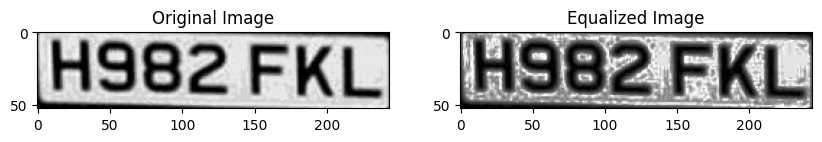

In [22]:
# Load image in grayscale
img_16_gray = cv2.imread('License_plate_16_gray_levels.jpg', 0)

# Perform histogram equalization
equalized_img = cv2.equalizeHist(img_16_gray)

# Display original and equalized image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img_16_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized Image')
plt.show()

### Histogram Matching

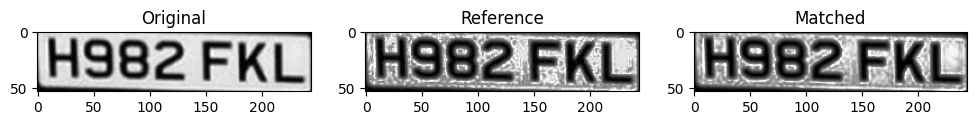

In [23]:
# reference_img = cv2.imread('License_plate_16_gray_levels.jpg', cv2.IMREAD_GRAYSCALE)
reference_img = equalized_img

# Perform histogram matching
matched_img = exposure.match_histograms(img_gray, reference_img, channel_axis=None)

# Display the result
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(reference_img, cmap='gray'), plt.title('Reference')
plt.subplot(1, 3, 3), plt.imshow(matched_img, cmap='gray'), plt.title('Matched')
plt.show()

### Adjust Brightness and Contrast

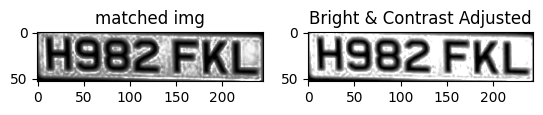

In [24]:
def adjust_brightness_contrast(matched_img, brightness=0, contrast=0):
    # Formula: new_img = img * contrast + brightness
    return cv2.convertScaleAbs(matched_img, alpha=contrast, beta=brightness)

# Adjust brightness and contrast
bright_img = adjust_brightness_contrast(matched_img, brightness=50, contrast=1.2)

# Display the result
plt.subplot(1, 2, 1), plt.imshow(matched_img, cmap='gray'), plt.title('matched img')
plt.subplot(1, 2, 2), plt.imshow(bright_img, cmap='gray'), plt.title('Bright & Contrast Adjusted')
plt.show()

## 2. Spatial Filtering

### Mean Filter

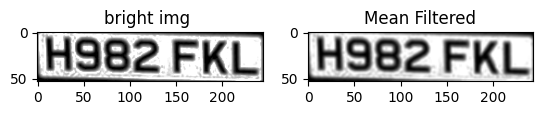

In [25]:
# Apply a mean filter (using a 3x3 kernel)
mean_filtered = cv2.blur(bright_img , (3, 3))

# Display
plt.subplot(1, 2, 1), plt.imshow(bright_img, cmap='gray'), plt.title('bright img ')
plt.subplot(1, 2, 2), plt.imshow(mean_filtered, cmap='gray'), plt.title('Mean Filtered')
plt.show()

### Median Filter

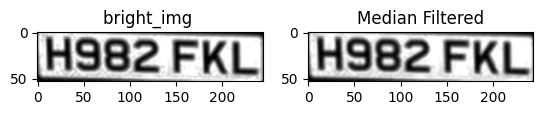

In [26]:
# Apply a median filter
median_filtered = cv2.medianBlur(mean_filtered , 3)

# Display
plt.subplot(1, 2, 1), plt.imshow(mean_filtered , cmap='gray'), plt.title('bright_img ')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.show()
io.imsave('Median_And_mean_Filtered.jpg', median_filtered)

### Laplacian Filter

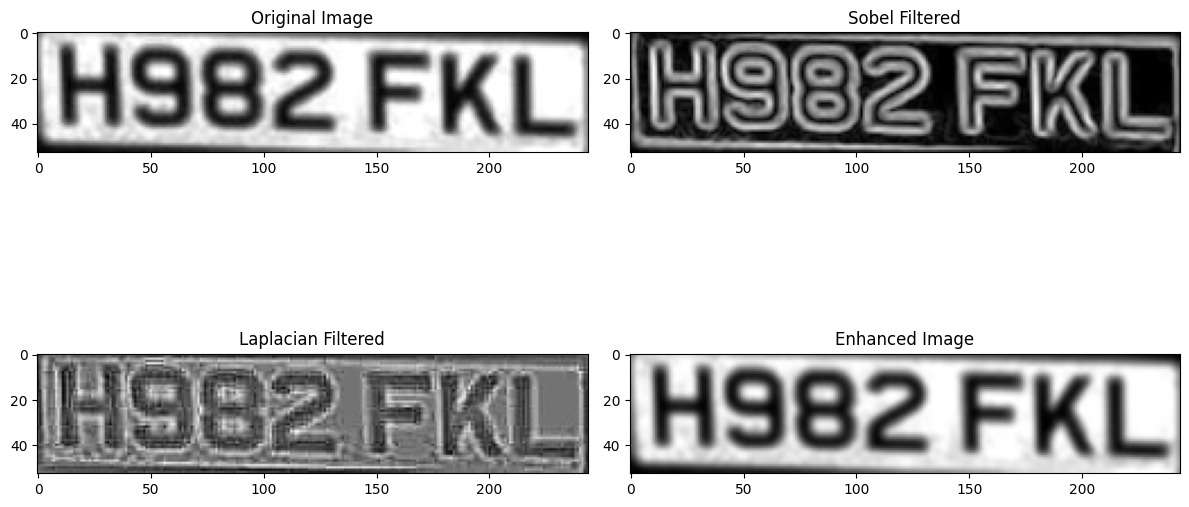

In [27]:
# Load the image
img = io.imread('Median_And_mean_Filtered.jpg')
img_gray = img_as_float(img)

# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original Image')

# Sobel filtering
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_v = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
tmp1 = convolve(img_gray, sobel_h)
tmp2 = convolve(img_gray, sobel_v)
sobel_filtered = np.sqrt(tmp1**2 + tmp2**2)
axs[0, 1].imshow(sobel_filtered, cmap='gray')
axs[0, 1].set_title('Sobel Filtered')

# Laplacian filtering
laplacian_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplacian_filtered = convolve(img_gray, laplacian_mask)
axs[1, 0].imshow(laplacian_filtered, cmap='gray')
axs[1, 0].set_title('Laplacian Filtered')

# Image enhancement
enhanced_img = img_gray - 0.1 * laplacian_filtered
enhanced_img = np.clip(enhanced_img, 0, 1)
axs[1, 1].imshow(enhanced_img, cmap='gray')
axs[1, 1].set_title('Enhanced Image')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

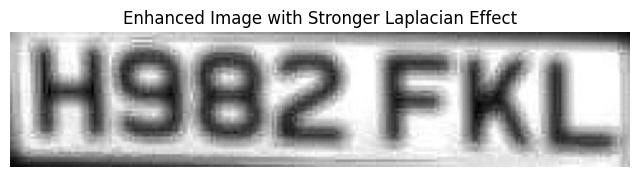

In [28]:
# Load the uploaded image (already grayscale)
img = io.imread('Median_And_mean_Filtered.jpg')
img_gray = img_as_float(img)  # Directly use the image as grayscale

# Laplacian filtering with stronger contrast enhancement
laplacian_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplacian_filtered = convolve(img_gray, laplacian_mask)

# Enhance the image by increasing the effect of the Laplacian filter
enhanced_img = img_gray - 0.5 * laplacian_filtered  # Increased weight from 0.1 to 0.5
enhanced_img = np.clip(enhanced_img, 0, 1)

# Display the results
plt.figure(figsize=(8, 6))
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image with Stronger Laplacian Effect')
plt.axis('off')
plt.show()

### High-Pass Filter

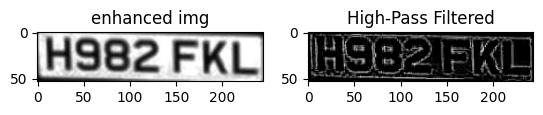

In [29]:
# Apply a high-pass filter using a kernel
high_pass_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
high_pass_filtered = cv2.filter2D(img, -1, high_pass_kernel)

# Display the result
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('enhanced img')
plt.subplot(1, 2, 2), plt.imshow(high_pass_filtered, cmap='gray'), plt.title('High-Pass Filtered')
plt.show()

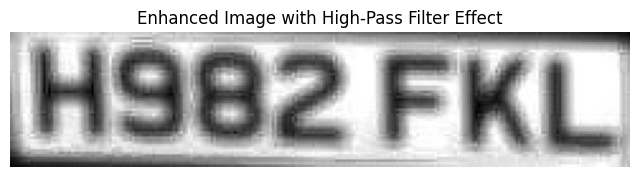

In [30]:
# Load the uploaded image (already grayscale)
img = io.imread('Median_And_mean_Filtered.jpg')
img_gray = img_as_float(img)  # Directly use the image as grayscale

# High-pass filtering
high_pass_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
high_pass_filtered = convolve(img_gray, high_pass_mask)

# Enhance the image by increasing the effect of the high-pass filter
enhanced_img = img_gray - 0.5 * high_pass_filtered  # Adjust the weight for enhancement
enhanced_img = np.clip(enhanced_img, 0, 1)

# Display the results
plt.figure(figsize=(8, 6))
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image with High-Pass Filter Effect')
plt.axis('off')
plt.show()

## 3. Frequency Domain Filtering

### Fourier Transform and Filtering

### 

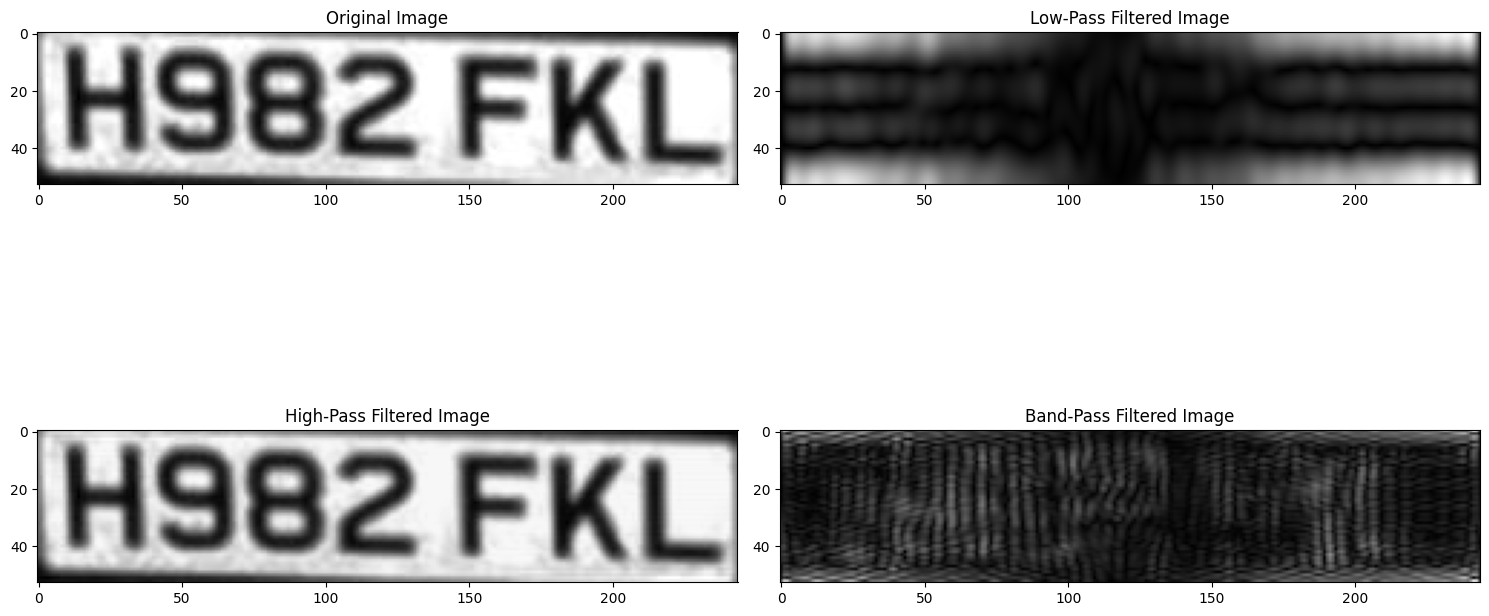

In [31]:
# Load the image
img = io.imread('Median_And_mean_Filtered.jpg')

# Convert to grayscale if the image has more than 2 dimensions (i.e., it's an RGB image)
if len(img.shape) > 2:
    img_gray = color.rgb2gray(img)
else:
    img_gray = img_as_float(img)

# Get the size of the image
rows, cols = img_gray.shape

# Perform Fourier transform of the image
f_transform = fftshift(fft2(img_gray))

# Function to create different filter masks
def create_filter(rows, cols, pass_type='low', radius_inner=20, radius_outer=50):
    mask = np.zeros((rows, cols), np.uint8)
    crow, ccol = rows // 2, cols // 2

    if pass_type == 'low':
        # Create a circular low-pass mask
        mask[crow-radius_outer:crow+radius_outer, ccol-radius_outer:ccol+radius_outer] = 1
    elif pass_type == 'high':
        # Create a circular high-pass mask (inverse of low-pass)
        mask = np.ones((rows, cols), np.uint8)
        mask[crow-radius_inner:crow+radius_inner, ccol-radius_inner:ccol+radius_inner] = 0
    elif pass_type == 'band':
        # Create a band-pass mask
        outer_circle = np.zeros((rows, cols), np.uint8)
        inner_circle = np.ones((rows, cols), np.uint8)
        outer_circle[crow-radius_outer:crow+radius_outer, ccol-radius_outer:ccol+radius_outer] = 1
        inner_circle[crow-radius_inner:crow+radius_inner, ccol-radius_inner:ccol+radius_inner] = 0
        mask = outer_circle * inner_circle  # Band-pass = Outer circle - Inner circle

    return mask

# Create masks for low-pass, high-pass, and band-pass filtering
low_pass_mask = create_filter(rows, cols, pass_type='low', radius_outer=30)
high_pass_mask = create_filter(rows, cols, pass_type='high', radius_inner=30)
band_pass_mask = create_filter(rows, cols, pass_type='band', radius_inner=20, radius_outer=50)

# Apply the masks by multiplying them with the Fourier transformed image
low_pass_filtered = f_transform * low_pass_mask
high_pass_filtered = f_transform * high_pass_mask
band_pass_filtered = f_transform * band_pass_mask

# Perform inverse Fourier transform to get the filtered images
low_pass_img = np.abs(ifft2(ifftshift(low_pass_filtered)))
high_pass_img = np.abs(ifft2(ifftshift(high_pass_filtered)))
band_pass_img = np.abs(ifft2(ifftshift(band_pass_filtered)))

# Display the results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# Low-Pass Filtered Image
plt.subplot(2, 2, 2)
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low-Pass Filtered Image')

# High-Pass Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High-Pass Filtered Image')

# Band-Pass Filtered Image
plt.subplot(2, 2, 4)
plt.imshow(band_pass_img, cmap='gray')
plt.title('Band-Pass Filtered Image')

plt.tight_layout()
plt.show()

### Enhanced Image (Original + Low-Pass Filtered)

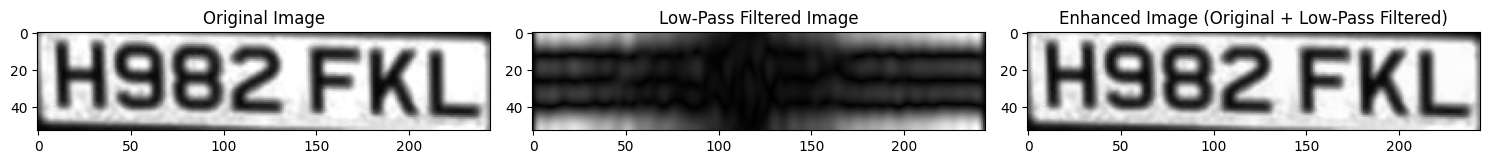

In [32]:
alpha = 0.7  # Blend factor, adjust this to control the level of enhancement
low_pass_enhanced_img = alpha * img_gray + (1 - alpha) * low_pass_img

# Display the original, low-pass filtered, and enhanced images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# Low-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low-Pass Filtered Image')

# Enhanced Image (Original + Low-pass Filtered)
plt.subplot(1, 3, 3)
plt.imshow(low_pass_enhanced_img , cmap='gray')
plt.title('Enhanced Image (Original + Low-Pass Filtered)')

plt.tight_layout()
plt.show()

### Enhanced Image (Original + High-Pass Filtered)

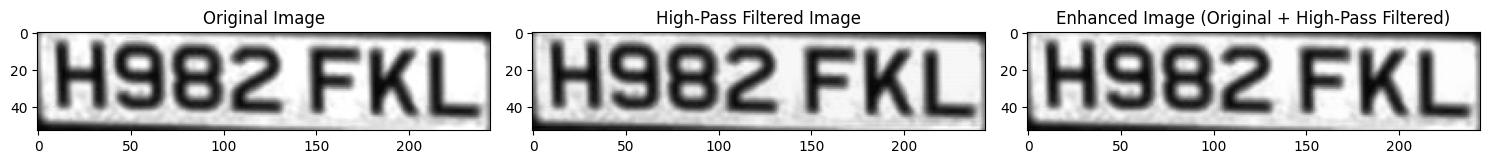

In [33]:
alpha = 0.7  # Blend factor, adjust this to control the level of enhancement
high_pass_enhanced_img = alpha * img_gray + (1 - alpha) * high_pass_img

# Display the original, high-pass filtered, and enhanced images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# High-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High-Pass Filtered Image')

# Enhanced Image (Original + High-pass Filtered)
plt.subplot(1, 3, 3)
plt.imshow(high_pass_enhanced_img, cmap='gray')
plt.title('Enhanced Image (Original + High-Pass Filtered)')

plt.tight_layout()
plt.show()

### Enhanced Image (Original + Band-Pass Filtered)

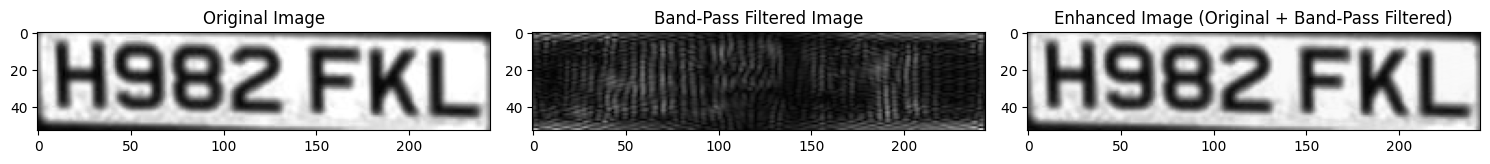

In [34]:
alpha = 0.7  # Blend factor, adjust this to control the level of enhancement
band_pass_enhanced_img = alpha * img_gray + (1 - alpha) * band_pass_img

# Display the original, band-pass filtered, and enhanced images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# Band-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(band_pass_img, cmap='gray')
plt.title('Band-Pass Filtered Image')

# Enhanced Image (Original + Band-pass Filtered)
plt.subplot(1, 3, 3)
plt.imshow(band_pass_enhanced_img, cmap='gray')
plt.title('Enhanced Image (Original + Band-Pass Filtered)')

plt.tight_layout()
plt.show()

## Module 2: Image Segmentation and Edge Detection (Handled by Student 2)

### 1.Edge Detection:

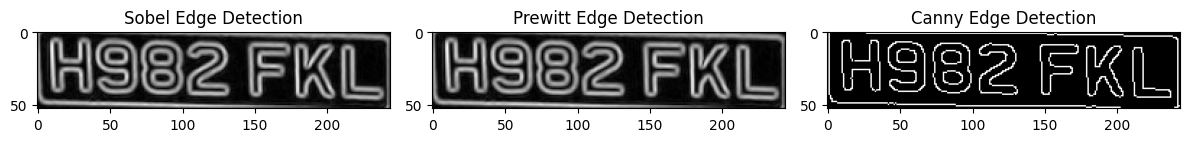

In [35]:
import skimage.color as color 
# Load the image
image = img_cropped
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert from RGB to grayscale
gray_image = color.rgb2gray(img_rgb)

# Convert the grayscale image to 8-bit for Canny
gray_image_8bit = (gray_image * 255).astype(np.uint8)

# Apply Sobel, Prewitt, and Canny edge detection
sobel_edges = filters.sobel(gray_image)
prewitt_edges = filters.prewitt(gray_image)
canny_edges = cv2.Canny(gray_image_8bit, 100, 200)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()


### 2.Image Segmentation:

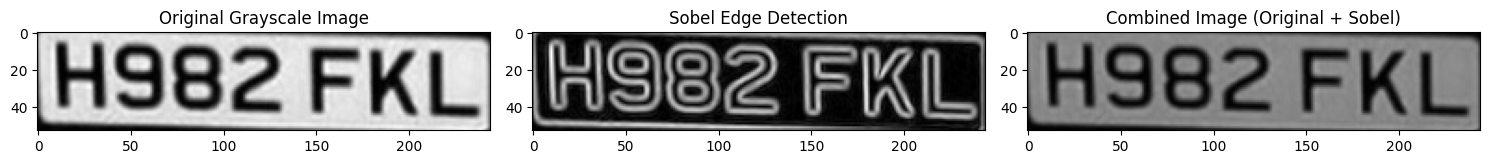

In [36]:
# Apply Sobel edge detection
sobel_edges = filters.sobel(gray_image)

# Normalize the Sobel edges to [0, 255] for proper display
sobel_edges_normalized = (sobel_edges * 255).astype(np.uint8)

# Combine the original grayscale image with the Sobel edge detection result
combined_sobel_image = cv2.addWeighted(cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR), 0.7, 
                                       cv2.cvtColor(sobel_edges_normalized, cv2.COLOR_GRAY2BGR), 0.3, 0)

# Display the original grayscale image, Sobel edge detection, and combined result
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image_8bit, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges_normalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Image (Original + Sobel)")
plt.imshow(cv2.cvtColor(combined_sobel_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


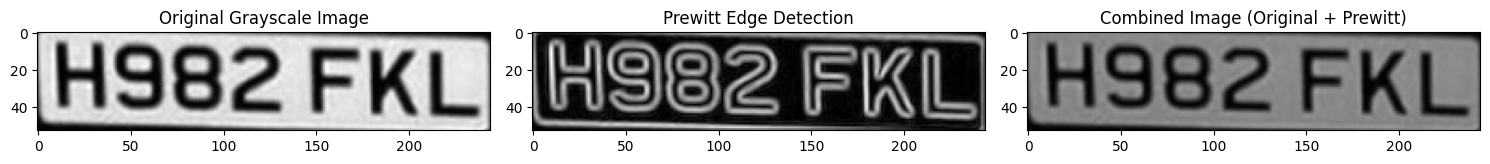

In [37]:
# Apply Prewitt edge detection
prewitt_edges = filters.prewitt(gray_image)

# Normalize the edges to [0, 255] for proper display
prewitt_edges_normalized = (prewitt_edges * 255).astype(np.uint8)

# Combine the original grayscale image with the Prewitt edge detection result
combined_image = cv2.addWeighted(cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR), 0.7, 
                                 cv2.cvtColor(prewitt_edges_normalized, cv2.COLOR_GRAY2BGR), 0.3, 0)

# Display the original grayscale image, Prewitt edge detection, and combined result
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image_8bit, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges_normalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Image (Original + Prewitt)")
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


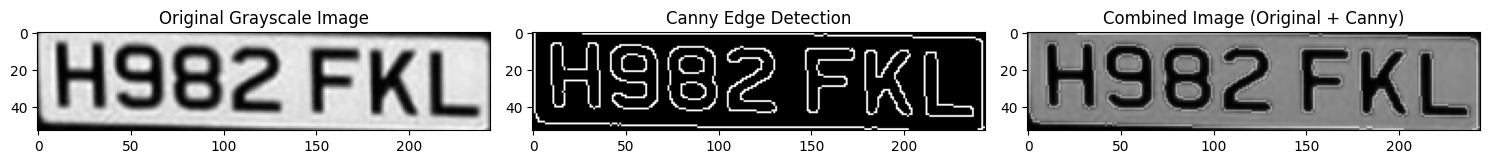

In [38]:
# Apply Canny edge detection
canny_edges = cv2.Canny(gray_image_8bit, 100, 200)

# Combine the original grayscale image with the Canny edge detection result
canny_edges_bgr = cv2.cvtColor(canny_edges, cv2.COLOR_GRAY2BGR)
combined_canny_image = cv2.addWeighted(cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR), 0.7, canny_edges_bgr, 0.3, 0)

# Display the original grayscale image, Canny edge detection, and combined result
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image_8bit, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Image (Original + Canny)")
plt.imshow(cv2.cvtColor(combined_canny_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


### 3.Morphological Operations:

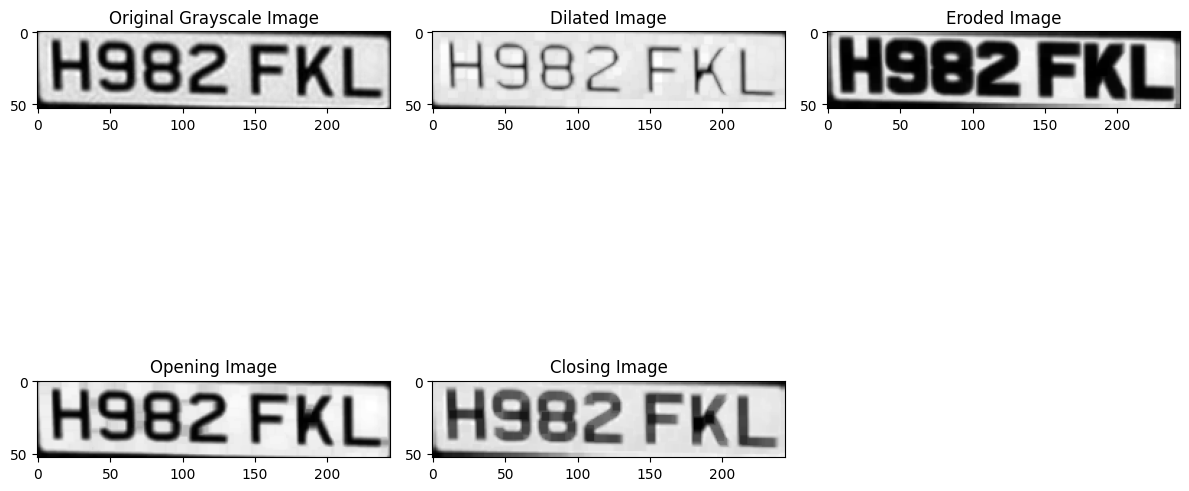

In [39]:

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform dilation, erosion, opening, and closing
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)
eroded_image = cv2.erode(gray_image, kernel, iterations=1)
opening_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
closing_image = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Opening Image")
plt.imshow(opening_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Closing Image")
plt.imshow(closing_image, cmap='gray')

plt.tight_layout()
plt.show()


### 3.1 Original Grayscale Image

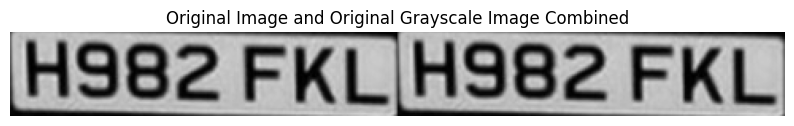

In [40]:
# Convert the grayscale image to 8-bit for OpenCV operations
gray_image_8bit = (gray_image * 255).astype(np.uint8)

# Convert the 8-bit grayscale image to 3 channels
grayscale_3ch = cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR)

# Combine the two 3-channel images side by side
combined_image = np.hstack((grayscale_3ch, grayscale_3ch))

# Display the combined result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Original Grayscale Image Combined")
plt.axis('off')
plt.show()


### 3.2 Dilated Image

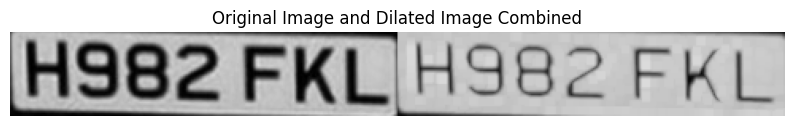

In [41]:

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform dilation
dilated_image = cv2.dilate(gray_image_8bit, kernel, iterations=1)

# Convert original grayscale and dilated images to 3-channel images
original_gray_image_3ch = cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR)
dilated_image_3ch = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the dilated image side by side
combined_image_gray_dilated = np.hstack((original_gray_image_3ch, dilated_image_3ch))

# Display the grayscale original and dilated images side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image_gray_dilated, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Dilated Image Combined")
plt.axis('off')
plt.show()


### 3.3 Eroded Image

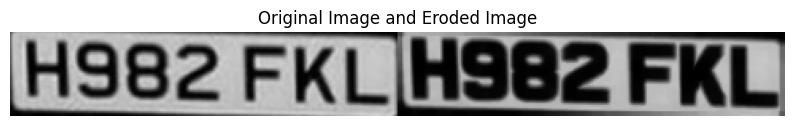

In [42]:

# Convert the grayscale image to 8-bit
gray_image_8bit = (gray_image * 255).astype(np.uint8)

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform erosion
eroded_image = cv2.erode(gray_image_8bit, kernel, iterations=1)

# Convert the original grayscale image to 3-channel version
original_gray_image = cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR)

# Convert eroded image to 3 channels to match the original grayscale image
eroded_image_3ch = cv2.cvtColor(eroded_image, cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the eroded image side by side
combined_image_gray_eroded = np.hstack((original_gray_image, eroded_image_3ch))

# Display the grayscale original and eroded image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image_gray_eroded, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Eroded Image")
plt.axis('off')
plt.show()


### 3.4 Opening Image

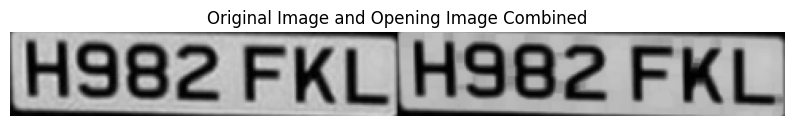

In [43]:

# Convert the grayscale image to 8-bit for OpenCV operations
gray_image_8bit = (gray_image * 255).astype(np.uint8)

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform opening operation (erosion followed by dilation)
opening_image = cv2.morphologyEx(gray_image_8bit, cv2.MORPH_OPEN, kernel)

# Convert the original grayscale image to 3-channel version
original_gray_image_3ch = cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR)

# Convert opening image to 3 channels to match the grayscale original image
opening_image_3ch = cv2.cvtColor(opening_image, cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the opening image side by side
combined_image_gray_opening = np.hstack((original_gray_image_3ch, opening_image_3ch))

# Display the grayscale original and opening image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image_gray_opening, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Opening Image Combined")
plt.axis('off')
plt.show()


### 3.5 Closing Image

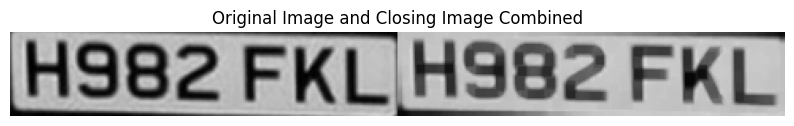

In [44]:
# Convert the grayscale image to 8-bit for OpenCV operations
gray_image_8bit = (gray_image * 255).astype(np.uint8)

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform closing operation on the grayscale image
closing_image = cv2.morphologyEx(gray_image_8bit, cv2.MORPH_CLOSE, kernel)

# Convert the closing image to 3 channels to match the original
closing_image_3ch = cv2.cvtColor(closing_image, cv2.COLOR_GRAY2BGR)

# Convert the original image to grayscale (3-channel version)
original_gray_image_3ch = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the closing image side by side
combined_gray_closing = np.hstack((original_gray_image_3ch, closing_image_3ch))

# Display the grayscale original and closing image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_gray_closing, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Closing Image Combined")
plt.axis('off')
plt.show()


# Module 3: Geometric Transformations and Interpolation

## 1. Geometric Transformations
### 1.1 Image Translation, Scaling (Zooming), Rotation, and Affine Transformations

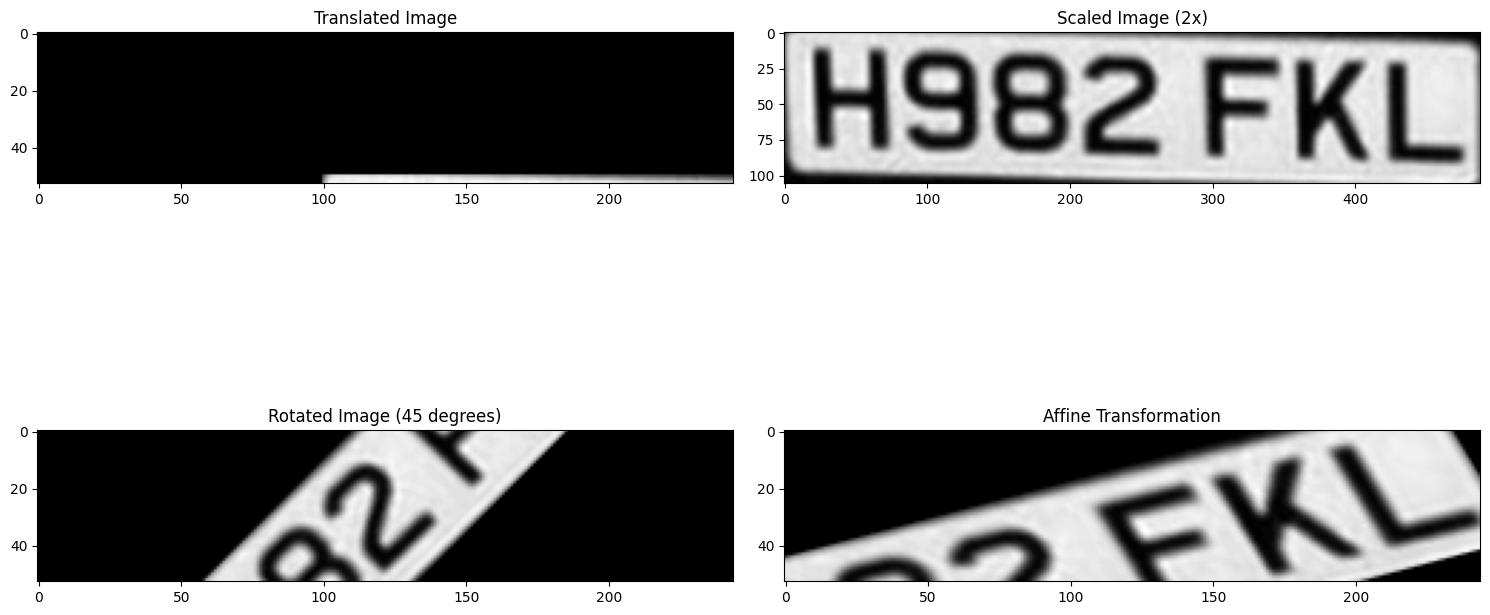

In [45]:
# Load the image and convert to grayscale
img = img_cropped
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = color.rgb2gray(img_rgb)
img_gray_8bit = (img_gray * 255).astype(np.uint8)  # Convert to 8-bit

rows, cols = img_gray_8bit.shape

# Translation (move right by 100, down by 50)
M_translation = np.float32([[1, 0, 100], [0, 1, 50]])
translated_img = cv2.warpAffine(img_gray_8bit, M_translation, (cols, rows))

# Scaling (zoom 2x)
scaled_img = cv2.resize(img_gray_8bit, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Rotation (45 degrees)
M_rotation = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_img = cv2.warpAffine(img_gray_8bit, M_rotation, (cols, rows))

# Affine transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine(img_gray_8bit, M_affine, (cols, rows))

# Plot the transformations
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1), plt.imshow(translated_img, cmap='gray'), plt.title('Translated Image')
plt.subplot(2, 2, 2), plt.imshow(scaled_img, cmap='gray'), plt.title('Scaled Image (2x)')
plt.subplot(2, 2, 3), plt.imshow(rotated_img, cmap='gray'), plt.title('Rotated Image (45 degrees)')
plt.subplot(2, 2, 4), plt.imshow(affine_img, cmap='gray'), plt.title('Affine Transformation')
plt.tight_layout()
plt.show()


## 1.2 Forward and Reverse Mapping for Image Warping
### Forward Mapping Example:

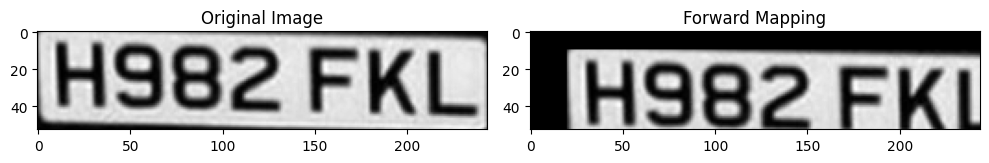

In [46]:
# Define forward mapping function
def forward_mapping(image, M):
    rows, cols = image.shape
    result = np.zeros_like(image)
    for y in range(rows):
        for x in range(cols):
            new_pos = np.dot(M, [x, y, 1])
            new_x, new_y = int(new_pos[0]), int(new_pos[1])
            if 0 <= new_x < cols and 0 <= new_y < rows:
                result[new_y, new_x] = image[y, x]
    return result

# Translation matrix example for forward mapping (move right by 100, down by 50)
M_forward = np.float32([[1, 0, 20], [0, 1, 10], [0, 0, 1]])

# Apply forward mapping
forward_img = forward_mapping(img_gray_8bit, M_forward)

# Plot the original and forward-mapped images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_gray_8bit, cmap='gray')
plt.title('Original Image')

# Forward Mapped Image
plt.subplot(1, 2, 2)
plt.imshow(forward_img, cmap='gray')
plt.title('Forward Mapping')

plt.tight_layout()
plt.show()


### Reverse Mapping Example:

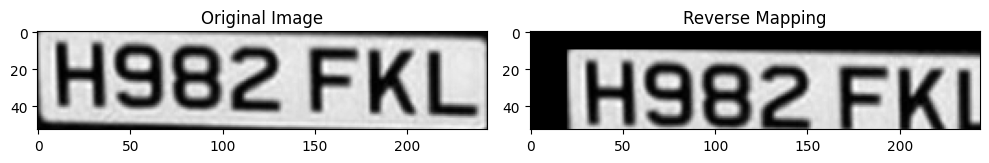

In [47]:
# Define reverse mapping function
def reverse_mapping(image, M_inv):
    rows, cols = image.shape
    result = np.zeros_like(image)
    for y in range(rows):
        for x in range(cols):
            old_pos = np.dot(M_inv, [x, y, 1])
            old_x, old_y = int(old_pos[0]), int(old_pos[1])
            if 0 <= old_x < cols and 0 <= old_y < rows:
                result[y, x] = image[old_y, old_x]
    return result

# Translation matrix example for forward mapping (move right by 100, down by 50)
M_forward = np.float32([[1, 0, 20], [0, 1, 10], [0, 0, 1]])

# Inverse of the translation matrix
M_inv = np.linalg.inv(M_forward)

# Apply reverse mapping
reverse_img = reverse_mapping(img_gray_8bit, M_inv)

# Plot the original and reverse-mapped images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_gray_8bit, cmap='gray')
plt.title('Original Image')

# Reverse Mapped Image
plt.subplot(1, 2, 2)
plt.imshow(reverse_img, cmap='gray')
plt.title('Reverse Mapping')

plt.tight_layout()
plt.show()


## 1.3 Radial Distortion Correction

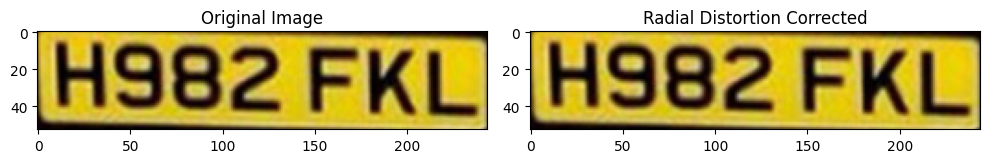

In [48]:
h, w = img.shape[:2]
camera_matrix = np.array([[1000, 0, w//2], [0, 1000, h//2], [0, 0, 1]], dtype="double")

# Adjust distortion coefficients (k1, k2, p1, p2, k3)
dist_coeffs = np.array([0.1, -0.05, 0.0005, 0.0001, 0.5])

# Correct radial distortion
corrected_img = cv2.undistort(img_rgb, camera_matrix, dist_coeffs)

# Display the original and corrected images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(corrected_img)
plt.title('Radial Distortion Corrected')

plt.tight_layout()
plt.show()


# 2. Interpolation Techniques
## 2.1 Nearest-Neighbor Interpolation

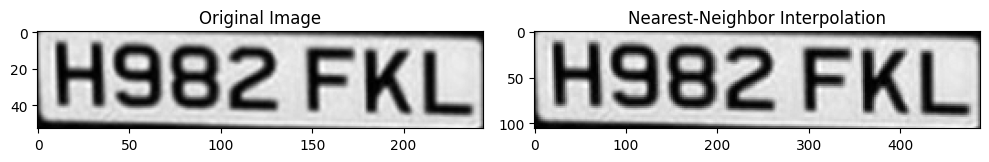

In [49]:
# Nearest-Neighbor Interpolation (resize by 2x)
nearest_neighbor_img = cv2.resize(img_gray_8bit, (cols * 2, rows * 2), interpolation=cv2.INTER_NEAREST)

# Plot the original and nearest-neighbor interpolated images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_gray_8bit, cmap='gray')
plt.title('Original Image')

# Nearest-Neighbor Interpolated Image
plt.subplot(1, 2, 2)
plt.imshow(nearest_neighbor_img, cmap='gray')
plt.title('Nearest-Neighbor Interpolation')

plt.tight_layout()
plt.show()

## 2.2 Bilinear Interpolation

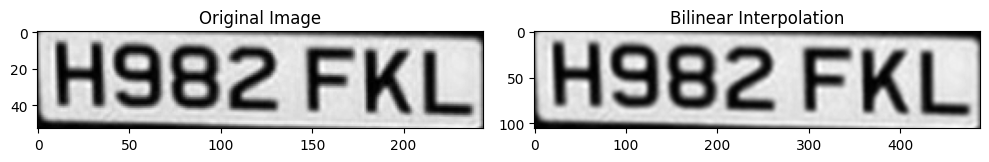

In [50]:
# Bilinear Interpolation (resize by 2x)
bilinear_img = cv2.resize(img_gray_8bit, (cols * 2, rows * 2), interpolation=cv2.INTER_LINEAR)

# Plot the original and bilinear interpolated images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_gray_8bit, cmap='gray')
plt.title('Original Image')

# Bilinear Interpolated Image
plt.subplot(1, 2, 2)
plt.imshow(bilinear_img, cmap='gray')
plt.title('Bilinear Interpolation')

plt.tight_layout()
plt.show()

## 2.3 Bicubic Interpolation

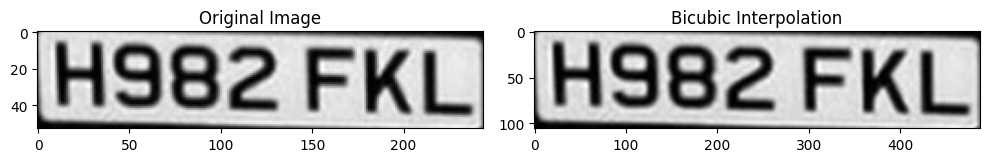

In [51]:
# Bicubic Interpolation (resize by 2x)
bicubic_img = cv2.resize(img_gray_8bit, (cols * 2, rows * 2), interpolation=cv2.INTER_CUBIC)

# Plot the original and bicubic interpolated images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_gray_8bit, cmap='gray')
plt.title('Original Image')

# Bicubic Interpolated Image
plt.subplot(1, 2, 2)
plt.imshow(bicubic_img, cmap='gray')
plt.title('Bicubic Interpolation')

plt.tight_layout()
plt.show()

# 3. Image Registration (Optional, Advanced)
## Basic Image Registration Using Feature Matching (ORB):

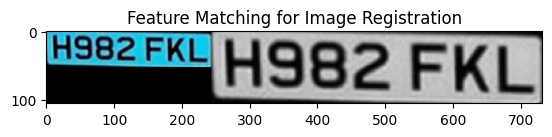

(<matplotlib.image.AxesImage at 0x1ba273b36e0>,
 Text(0.5, 1.0, 'Feature Matching for Image Registration'),
 None)

In [52]:
# Load two images for registration
img1 = img_cropped # Grayscale image 1
img2 = nearest_neighbor_img  # Grayscale image 2

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute-force matcher to match keypoints
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
plt.imshow(img_matches), plt.title('Feature Matching for Image Registration'), plt.show()
